# Evan Scott

## Research question/interests

Investigating which team was the highest scoring in history, as well as the correlation between the total score and average positioning to see if there is any correlation with scoring and years in competition. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns 
import csv

In [2]:
print(pd.__version__)

1.3.4


In [3]:
f1data = pd.read_csv("../data/raw/f1data.csv")

## Milestone 3 Task 1 (EDA)

In [4]:
f1data.shape

(1573, 6)

In [5]:
f1data.columns

Index(['Pos', 'Driver', 'Nationality', 'Car', 'PTS', 'Year'], dtype='object')

In [6]:
f1data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,PTS,Year
count,1573.000000,1573.000000
mean,27.207883,1985.148760
std,52.585197,20.744311
min,0.000000,1950.000000
25%,3.000000,1967.000000
50%,8.000000,1985.000000
75%,28.000000,2004.000000
max,413.000000,2020.000000


<AxesSubplot:xlabel='Pos', ylabel='PTS'>

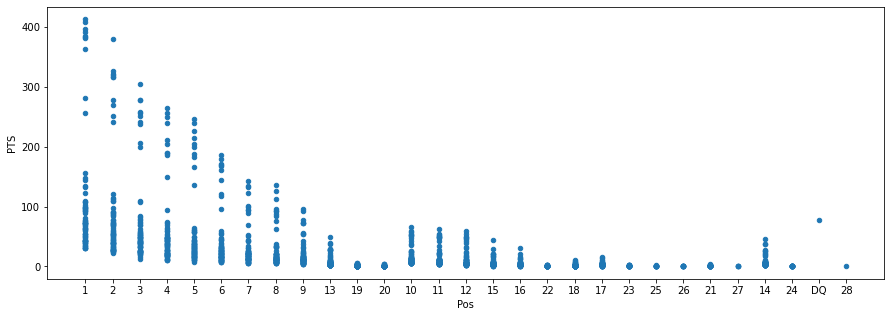

In [7]:
f1data.plot(kind='scatter', x='Pos', y='PTS', figsize=(15,5))

This shows the distribution between points and position, showing that higher positions result in higher points. The outlier is DQ since they have a higher score, although they were eliminate from competition.

<AxesSubplot:xlabel='Nationality', ylabel='PTS'>

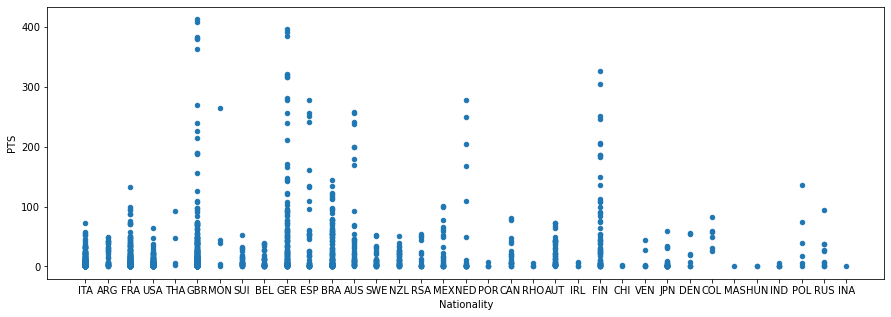

In [8]:
f1data.plot(kind='scatter', x='Nationality', y='PTS',figsize=(15,5))

This indicates that countries such as Great Britain and Germany have the highest scoring racers in history. Where countries such as Hungary have scored some of the lowest scores and very few drivers. 

<AxesSubplot:ylabel='Frequency'>

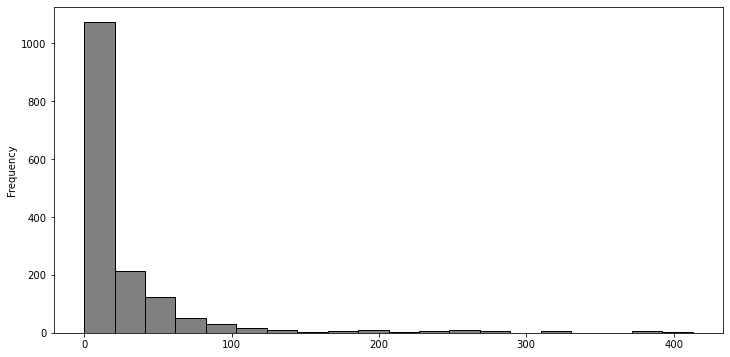

In [9]:
f1data['PTS'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')

This chart indicates that very few racers have scored high in the history of the race. This fits as the races in recent history have scored higher points. As well as it is more likely for a poor-average performance than a strong top performance. 

## MS3 Task 2

In [10]:
f1data.rename(columns={"Car": "Team", "Pos": "Position", "PTS": "Points"}, inplace=True)

In [11]:
#Checking to see if there are any null values.
f1data.isnull().any(axis=None)
print("Preview of data with null values:")
print(f1data[f1data.isnull().any(axis=1)])
plt.show()

Preview of data with null values:
    Position                  Driver Nationality Team  Points  Year
16        13     Dorino Serafini SER         ITA  NaN     3.0  1950
17        13  Philippe Etancelin ETA         FRA  NaN     3.0  1950
21        20      Eugene Chaboud CHA         FRA  NaN     1.0  1950
35        12        Louis Rosier ROS         FRA  NaN     3.0  1951
53        13         Ken Wharton WHA         GBR  NaN     3.0  1952
309       18      Masten Gregory GRE         USA  NaN     0.0  1963
314       18       Mike Hailwood HAI         GBR  NaN     0.0  1963
446       13     Richard Attwood ATT         GBR  NaN     3.0  1969
478        2     Ronnie Peterson PET         SWE  NaN    33.0  1971
492       16        Mark Donohue DON         USA  NaN     4.0  1971
493       16     Henri Pescarolo PES         FRA  NaN     4.0  1971


In [12]:
#Replacing the found null values in Team with Independant to properly represent information and allow visualization to be better represented
f1data["Team"].fillna("Independant", inplace=True)

In [13]:
f1data.loc[21,:]

Position                       20
Driver         Eugene Chaboud CHA
Nationality                   FRA
Team                  Independant
Points                        1.0
Year                         1950
Name: 21, dtype: object

In [14]:
#checking the delimiter
sniffer = csv.Sniffer()
dialect = sniffer.sniff("first, second, third, fourth")
print(dialect.delimiter)

,


In [15]:
#changing kimi's name so its spelt correctly
f1data['Driver'] = f1data['Driver'].replace(['Kimi RÃ¤ikkÃ¶nen RAI'],'Kimi Räikkönen RAI')
i=f1data[f1data['Driver']=='Kimi Räikkönen RAI']

In [16]:
#separating the driver id off of the Driver name, and adding it to a new column
f1data["Driver_ID"] = f1data["Driver"].str[-3:]
f1data["Driver2"] = f1data["Driver"].str[:-3]
f1data = f1data.drop(columns=["Driver"])
f1data.rename(columns={"Driver2": "Driver"}, inplace=True)

In [17]:
f1data = f1data[["Driver", "Driver_ID", "Nationality", "Team", "Position", "Points", "Year"]]
f1data

,Driver,Driver_ID,Nationality,Team,Position,Points,Year
0,Nino Farina,FAR,ITA,Alfa Romeo,1,30.0,1950
1,Juan Manuel Fangio,FAN,ARG,Alfa Romeo,2,27.0,1950
2,Luigi Fagioli,FAG,ITA,Alfa Romeo,3,24.0,1950
3,Louis Rosier,ROS,FRA,Talbot-Lago,4,13.0,1950
4,Alberto Ascari,ASC,ITA,Ferrari,5,11.0,1950
...,...,...,...,...,...,...,...
1568,Kevin Magnussen,MAG,DEN,Haas Ferrari,17,1.0,2020
1569,Kimi Räikkönen,RAI,FIN,Alfa Romeo Racing Ferrari,18,0.0,2020
1570,Nicholas Latifi,LAT,CAN,Williams Mercedes,19,0.0,2020
1571,George Russell,RUS,GBR,Williams Mercedes,20,0.0,2020


In [18]:
## This was done to make more sense of the data and have look cleaner

In [19]:
#Checking for duplicates
duplicateRowsDF = f1data[f1data.duplicated()]
if duplicateRowsDF.empty:
    print("There are no duplicate rows"),
else:
    print("Duplicate Rows except first occurrence based on all columns are:")
    print(duplicateRowsDF)

There are no duplicate rows


## Milestone 3, Task 3

In [23]:
def load_and_process(csv_file):

    # Method Chain 1 (Load data and deal with missing data)

    df1 = (
        pd.read_csv(csv_file)
        .rename(columns={"Car": "Team", "Pos": "Position", "PTS": "Points"})
        .fillna("Independant")
        .replace(["Kimi RÃ¤ikkÃ¶nen RAI"],"Kimi Räikkönen RAI")
        
        )

    # Method Chain 2 (Create new columns, drop others, and do processing)

    df2 = (
        df1
        .assign(Driver_ID = df1["Driver"].str[-3:],Driver2 = df1["Driver"].str[:-3])
        .drop(columns=["Driver"])
        .rename(columns={"Driver2": "Driver"})
        [["Driver", "Driver_ID", "Team", "Nationality", "Points", "Position", "Year"]]
      )

    # Make sure to return the latest dataframe

    return df2 


load_and_process("../data/raw/f1data.csv")

,Driver,Driver_ID,Team,Nationality,Points,Position,Year
0,Nino Farina,FAR,Alfa Romeo,ITA,30.0,1,1950
1,Juan Manuel Fangio,FAN,Alfa Romeo,ARG,27.0,2,1950
2,Luigi Fagioli,FAG,Alfa Romeo,ITA,24.0,3,1950
3,Louis Rosier,ROS,Talbot-Lago,FRA,13.0,4,1950
4,Alberto Ascari,ASC,Ferrari,ITA,11.0,5,1950
...,...,...,...,...,...,...,...
1568,Kevin Magnussen,MAG,Haas Ferrari,DEN,1.0,17,2020
1569,Kimi Räikkönen,RAI,Alfa Romeo Racing Ferrari,FIN,0.0,18,2020
1570,Nicholas Latifi,LAT,Williams Mercedes,CAN,0.0,19,2020
1571,George Russell,RUS,Williams Mercedes,GBR,0.0,20,2020


#### Below is basically an extension to my EDA, but I wanted to use my cleaned data

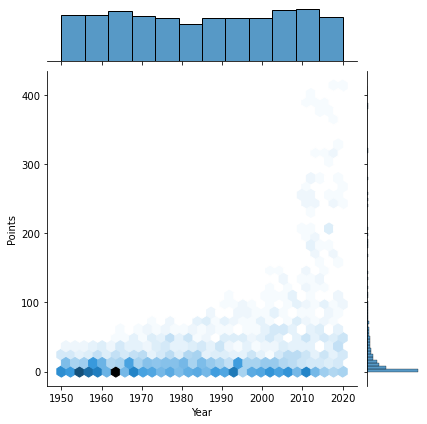

In [69]:
sns.jointplot(
              data=f1data, x="Year", y="Points", kind= 'hex'
)

This shows how F1 has increased in proportion in recent years with significantly higher point scores, as well as more distribution among different scores. It can also be seen that in early years, F1 racers all scored very similarly, which was a result of very few races occuring. 

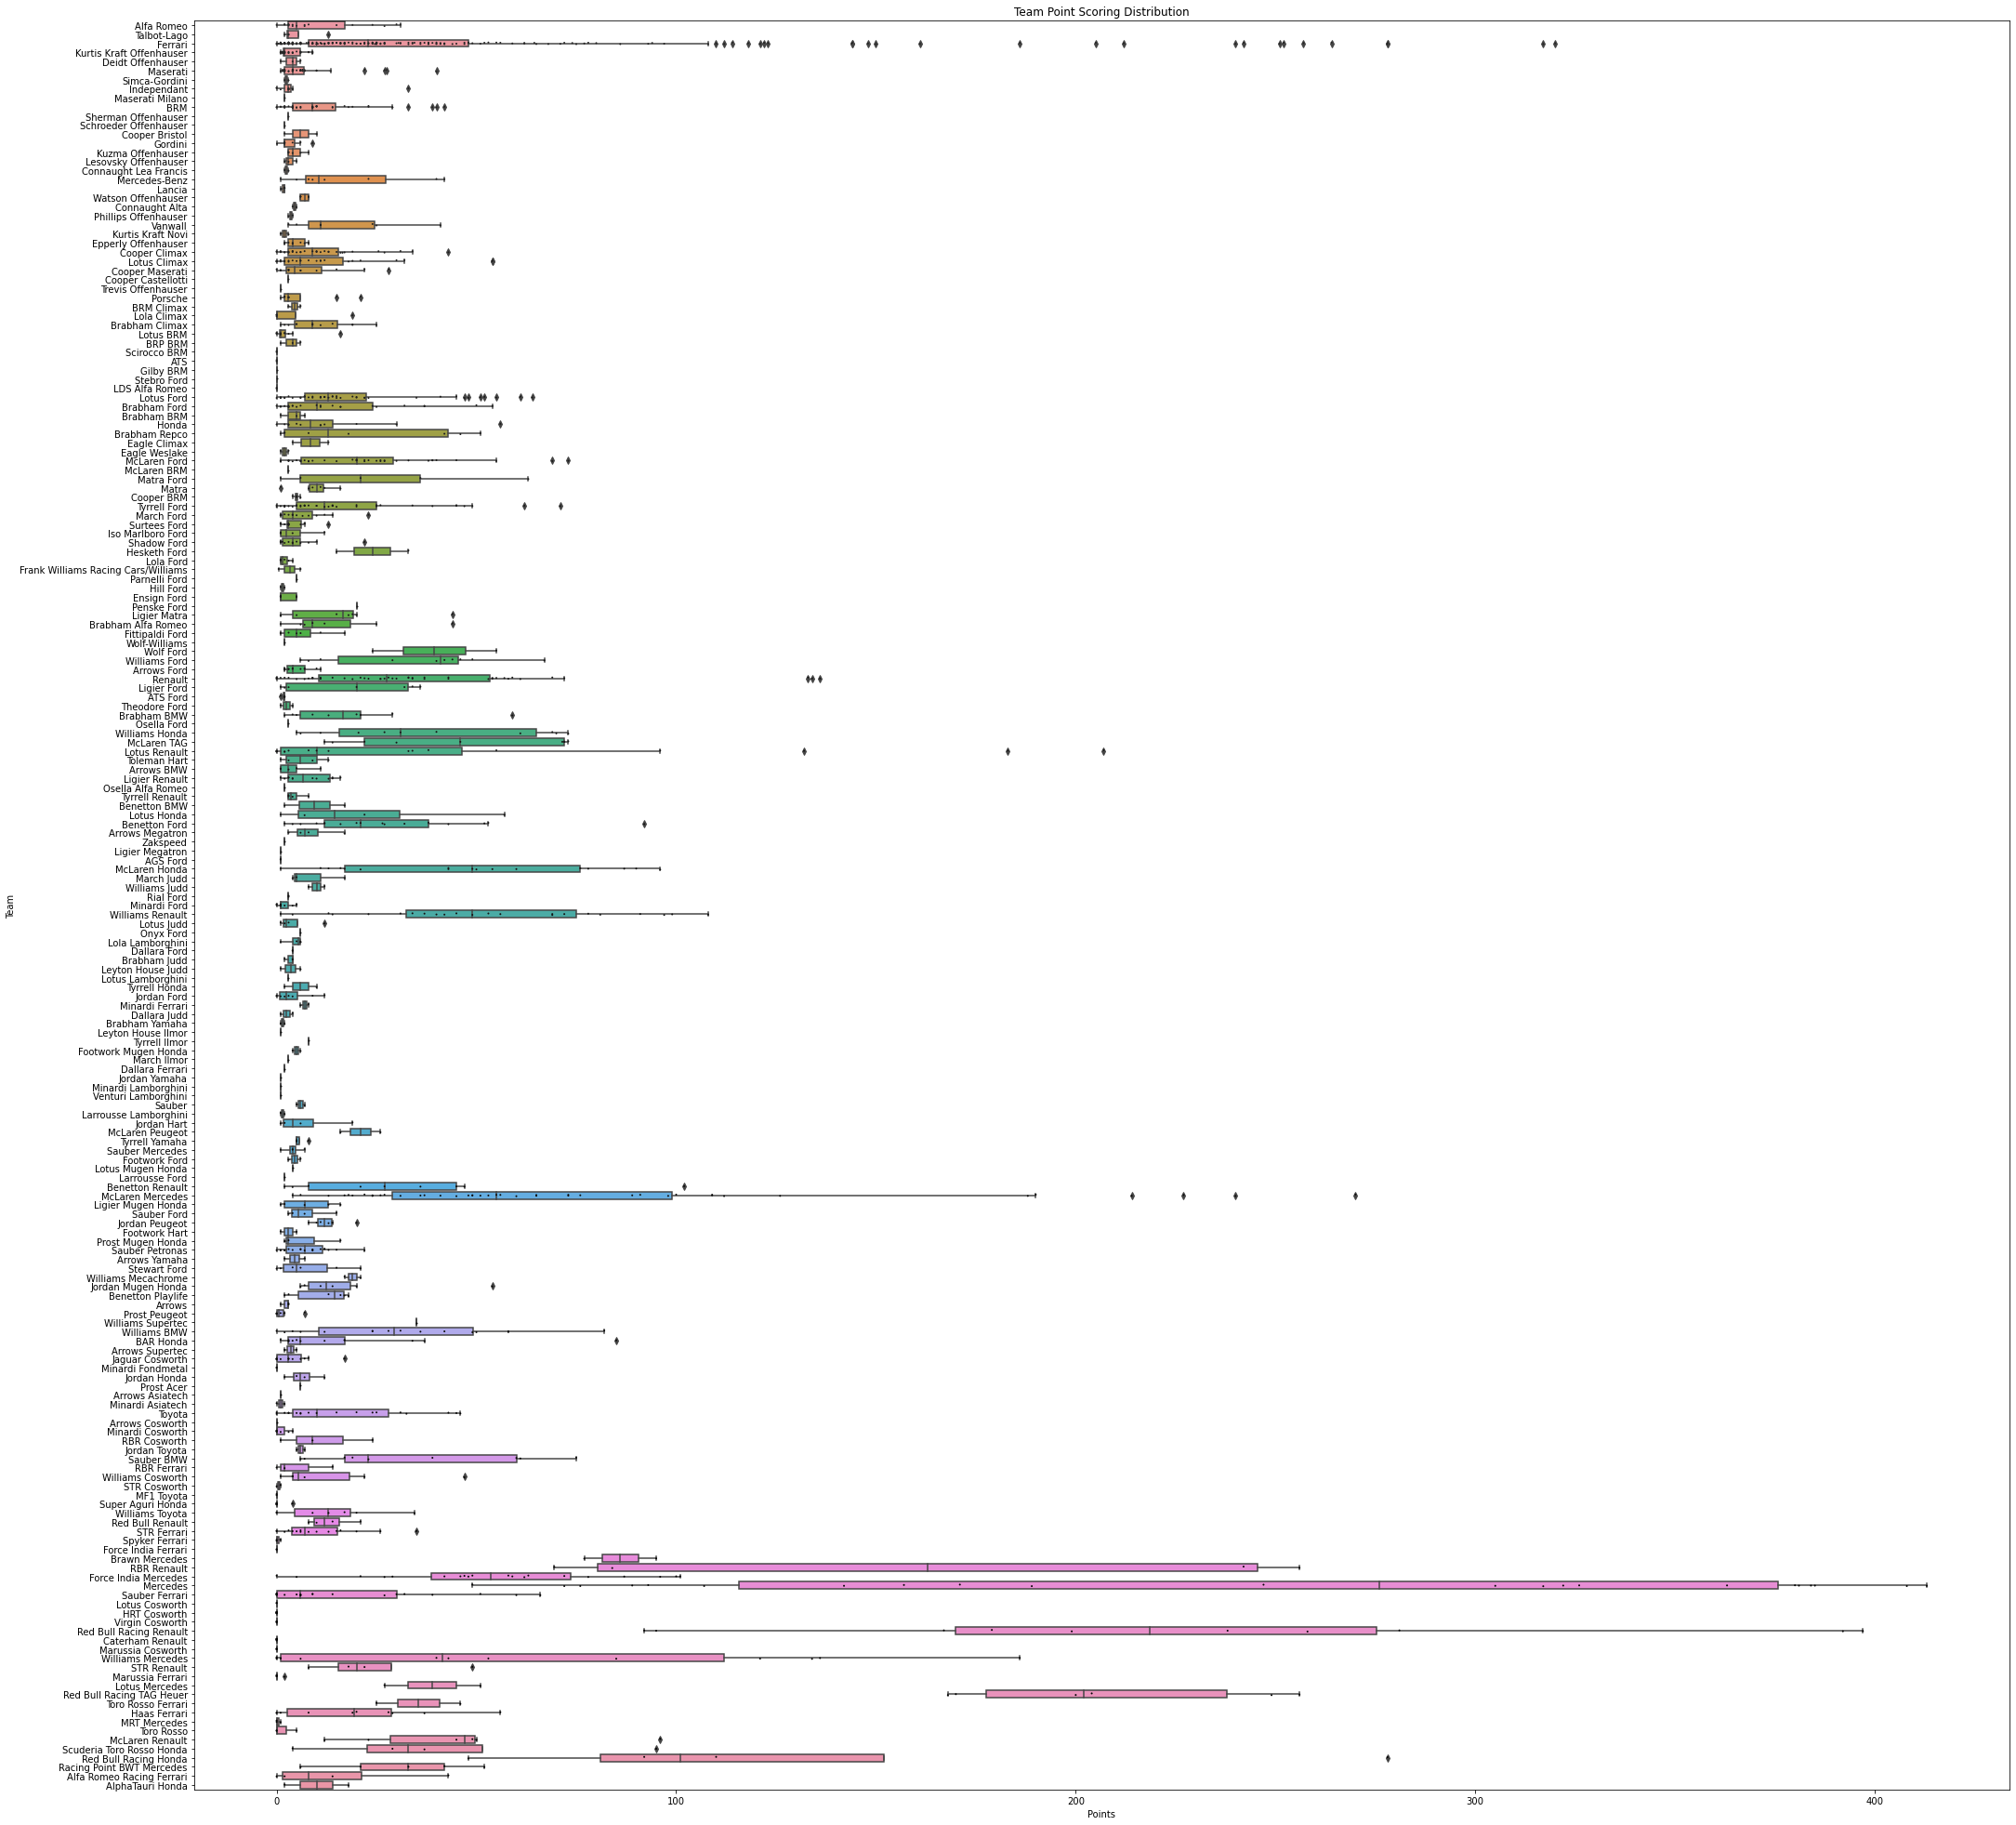

In [55]:
b = sns.boxplot(x="Points", y="Team", data=f1data)
b = sns.stripplot(x="Points", y="Team", data=f1data, size=2, palette="dark:black")
b.set(title = "Team Point Scoring Distribution")
b.figure.set_size_inches(35, 35)

Although this visualization takes a bit of zooming in to see, it clearly shows the distribution of the scores for each team well. We see Ferrari having the most data, while also having the most plots outside of their average range. This clearly indicates how they have experienced the benefits of the most total points while also not having the best overall driving. Where in the reverse, a team such as Mercedes, they have scored very high and continually place as a top team which boosts their overall total in points. 

There are also several teams that score very low which is indicative of the turnover rate within F1 racing over the years. It indicates that if a team has a poor performance in their debut, and no quick improvement, they lose sponsors and get replaced relatively quickly.

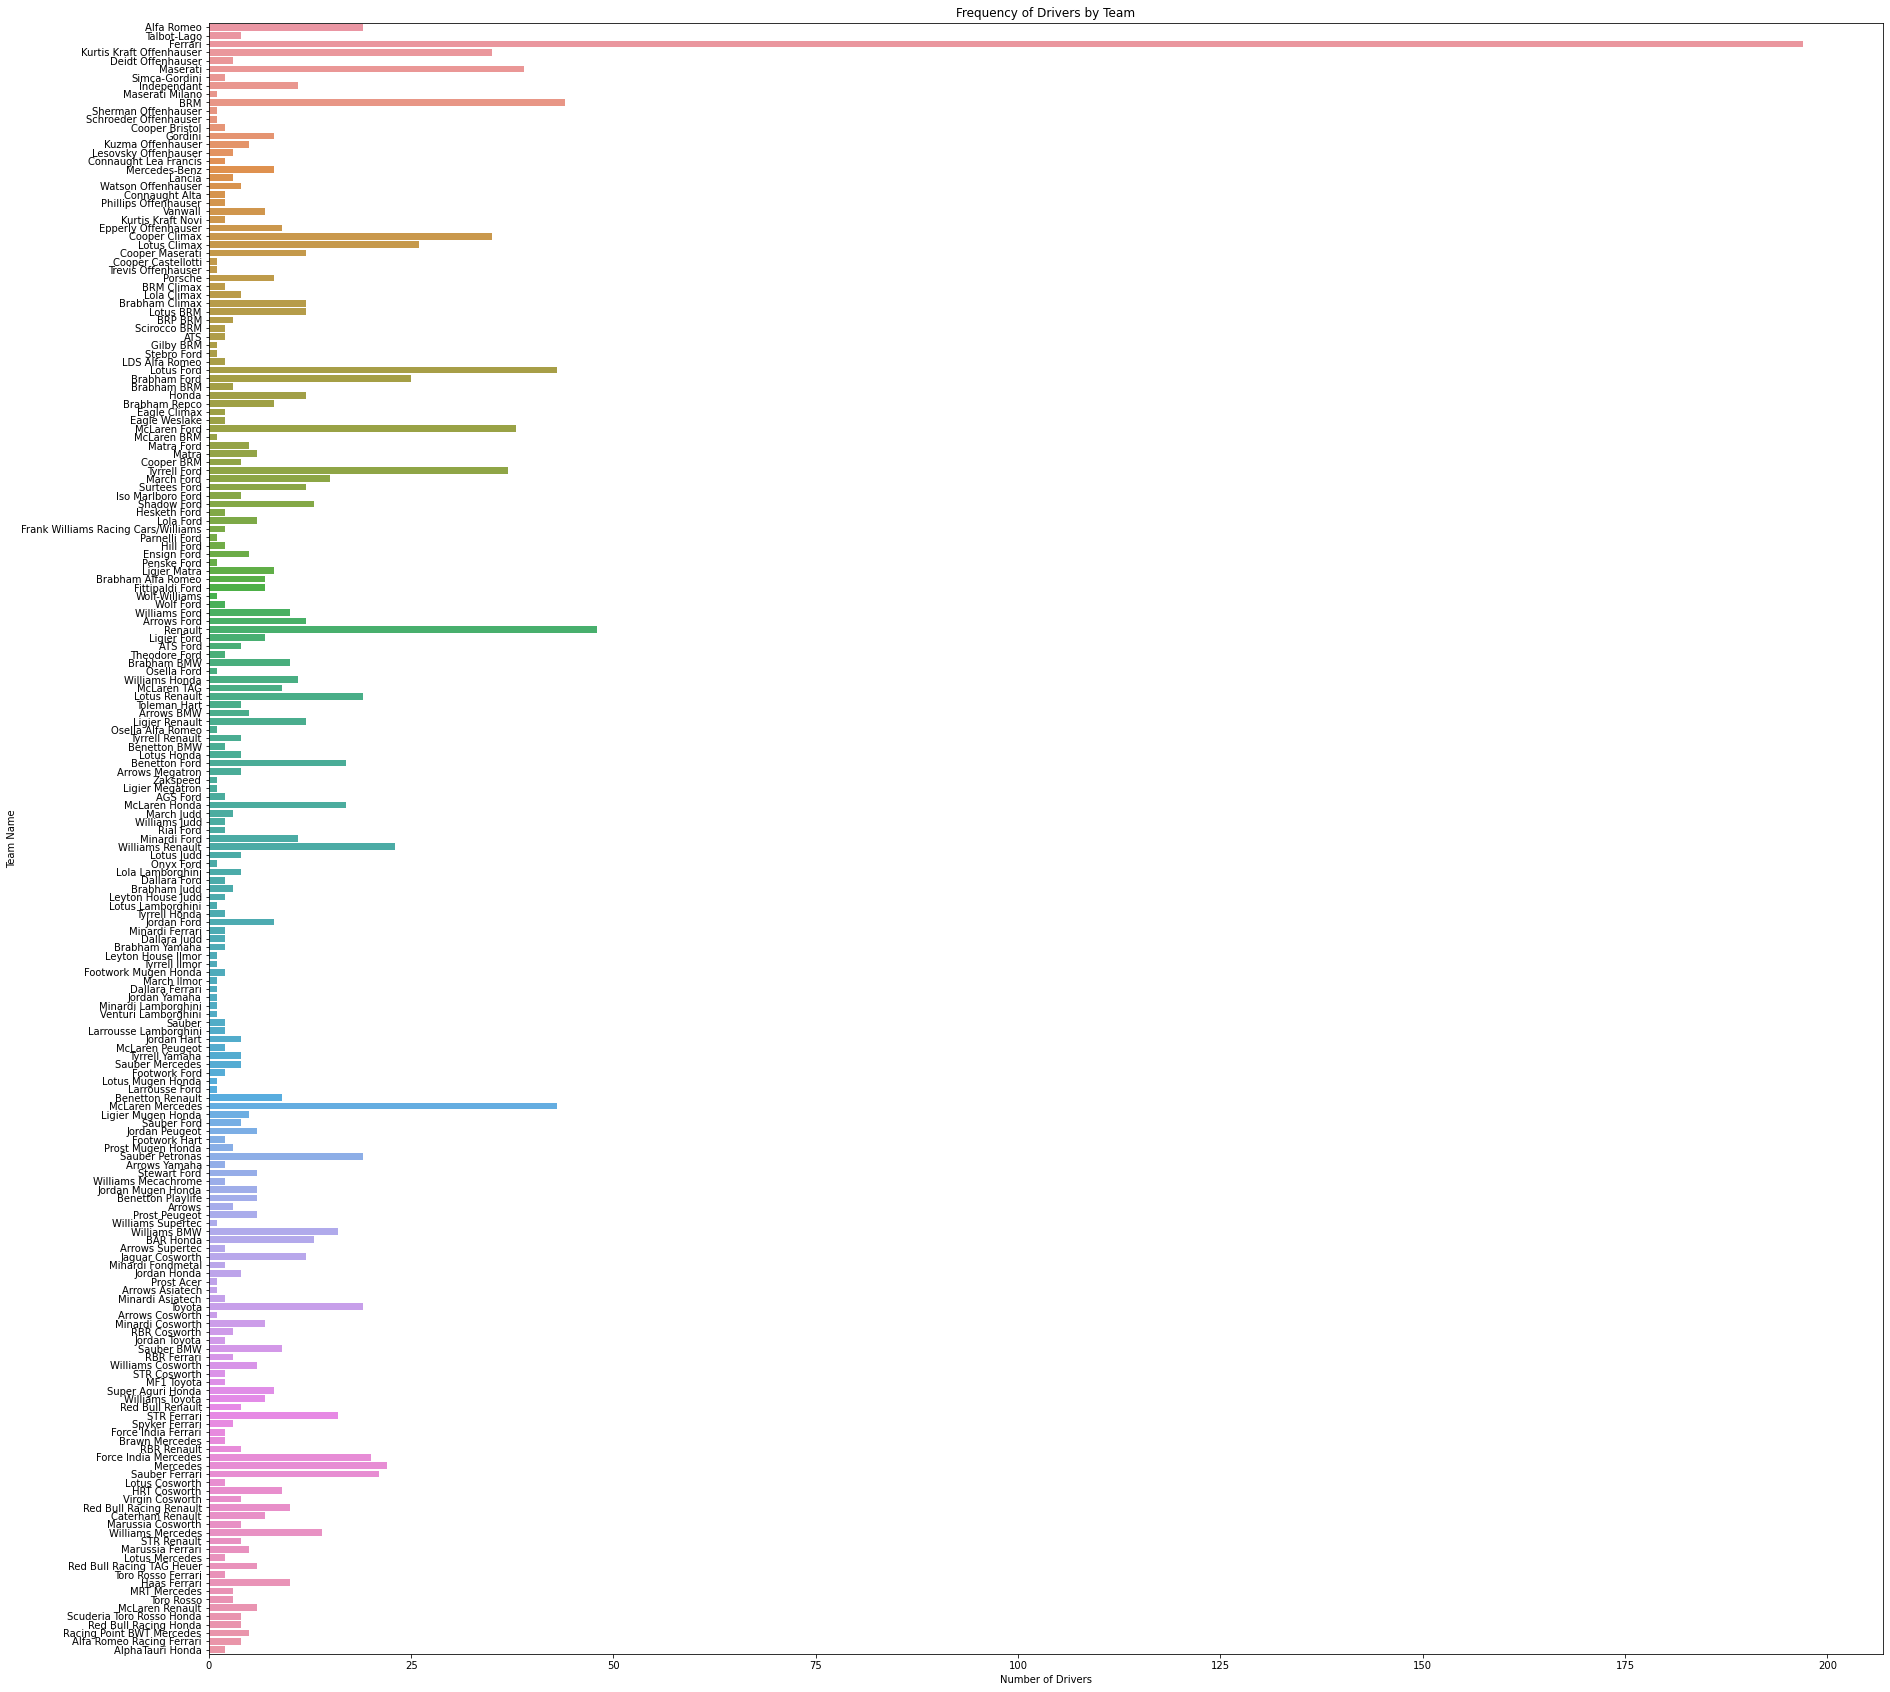

In [54]:
h = sns.countplot(y="Team", data=f1data)
h.set(ylabel="Team Name", xlabel="Number of Drivers", title="Frequency of Drivers by Team")
h.figure.set_size_inches(30,30)

Looking into this visualization, we can confirm the assumption from the previous visualization, that team Ferrari has had the most drivers which has led their top drivers scores to fall outside of their normal distribution. We can also see how much more impressive teams such as Mercedes is, as they have fewer racers, but still have a high cumulative score. 